In [1]:
import geoplot as gplt 
import geoplot.crs as gcrs
import geopandas as gpd
gpd.__version__
import matplotlib.pyplot as plt
import pandas as pd
import pyproj
from fiona.crs import from_epsg
import mapclassify as mc
import glob

#해안선 받아놓기

coastline= gpd.read_file('./Coastlinse_khoa/Coastlinse_khoa.shp', encoding='utf8')
#5179로변환  

coastline= coastline.to_crs(epsg=5179)

In [2]:
#맵 그리기 함수선언
def plot_map(data):
    ax = data.plot(figsize=(50, 30),facecolor='yellow', edgecolor='black',linewidth=0.5, zorder=2)
    coastline.plot(facecolor='#f6ebd4', edgecolor='black',ax=ax, zorder=1,linewidth=0.5)
    plt.grid(True, alpha=0.5, linestyle='--')
    
def plot_colormap(data, column, interval, data2=None, data3=None, figsize = [50,30]):
    if data2 is None:
        ax = data.plot(column, figsize=figsize,cmap = 'jet', linewidth=0, k=interval, legend=False)
        coastline.plot(facecolor='#f6ebd4', edgecolor='black',ax=ax, zorder=2,linewidth=0.5)
        plt.grid(True, alpha=0.5, linestyle='--')
    elif data3 is None:
        ax = data.plot(column, figsize=figsize,cmap = 'jet', linewidth=0, k=interval, legend=False)
        data2.plot(ax = ax, facecolor='black', edgecolor='black',linewidth=0.5)
        coastline.plot(facecolor='#f6ebd4', edgecolor='black',ax=ax, zorder=2,linewidth=0.5)
        plt.grid(True, alpha=0.5, linestyle='--')
    else:
        ax = data.plot(column, figsize=figsize,cmap = 'jet', linewidth=0, k=interval, legend=False)
        data2.plot(ax = ax, facecolor='black', edgecolor='black',linewidth=0.5)
        data3.plot(ax = ax, facecolor='red', edgecolor='black',linewidth=0.5)
        coastline.plot(facecolor='#f6ebd4', edgecolor='black',ax=ax, zorder=2,linewidth=0.5)
        plt.grid(True, alpha=0.5, linestyle='--')


In [3]:
input = gpd.read_file('./Ex/220203/남한육역 면적/남한육역 면적.shp', encoding='utf8')
# plot_map(input)

In [60]:
flist = glob.glob('./Ex/220203/법정정보/**/*.shp', recursive=True)
for fname in flist:
    print(fname.split('\\')[-1].split('.')[0])
flist

교통안전특정해역
도선사승하선구역
신항만예정지역
정박지구역
통항분리구역
통항제한금지구역
항로표지설치해역
항만구역
항만배후단지
깊은수심항로
마리나추천항로
양길항로
요트항로
일반항로
지방청 고시항로
지정항로
무역항
연안항
문화재구역
문화재보호구역
바다숲
인공어초
잘피숲
천연기념물
천연보호구역
특정도서
해양보호구역
해양보호생물서식지
해중경관지구
환경보전해역
국립공원
군립공원
도립공원
절대보전무인도서
준보전무인도서
바다목장(면)
바다목장(점)
생물권보전지역
생태경관보전지역
자연환경보전지역
서식산란장(면)
서식산란장(점)
세계유산지정구역
습지보호구역


['./Ex/220203/법정정보\\8.항만항행(18)\\교통안전특정해역.shp',
 './Ex/220203/법정정보\\8.항만항행(18)\\도선사승하선구역.shp',
 './Ex/220203/법정정보\\8.항만항행(18)\\신항만예정지역.shp',
 './Ex/220203/법정정보\\8.항만항행(18)\\정박지구역.shp',
 './Ex/220203/법정정보\\8.항만항행(18)\\통항분리구역.shp',
 './Ex/220203/법정정보\\8.항만항행(18)\\통항제한금지구역.shp',
 './Ex/220203/법정정보\\8.항만항행(18)\\항로표지설치해역.shp',
 './Ex/220203/법정정보\\8.항만항행(18)\\항만구역.shp',
 './Ex/220203/법정정보\\8.항만항행(18)\\항만배후단지.shp',
 './Ex/220203/법정정보\\8.항만항행(18)\\항로(7)\\깊은수심항로.shp',
 './Ex/220203/법정정보\\8.항만항행(18)\\항로(7)\\마리나추천항로.shp',
 './Ex/220203/법정정보\\8.항만항행(18)\\항로(7)\\양길항로.shp',
 './Ex/220203/법정정보\\8.항만항행(18)\\항로(7)\\요트항로.shp',
 './Ex/220203/법정정보\\8.항만항행(18)\\항로(7)\\일반항로.shp',
 './Ex/220203/법정정보\\8.항만항행(18)\\항로(7)\\지방청 고시항로.shp',
 './Ex/220203/법정정보\\8.항만항행(18)\\항로(7)\\지정항로.shp',
 './Ex/220203/법정정보\\8.항만항행(18)\\항만시설(2)\\무역항.shp',
 './Ex/220203/법정정보\\8.항만항행(18)\\항만시설(2)\\연안항.shp',
 './Ex/220203/법정정보\\9.환경생태계(26)\\문화재구역.shp',
 './Ex/220203/법정정보\\9.환경생태계(26)\\문화재보호구역.shp',
 './Ex/220203/법정정보\\9.환경생태계(26)\\바다숲

In [61]:
# flist = ['D:/###기타업무/개인연구/2021/Geopandas/Ex/220203/법정정보/8.항만항행(18)/항로표지설치해역.shp']
for fname in flist[:1]:
    print(fname.split('\\')[-1].split('.')[0])
    try:
        object = gpd.read_file(fname, encoding='utf8')
        # object = object['geometry']
    except Exception as e:
        # print(e, fname)
        object = gpd.read_file(fname, encoding='euckr')
        # object = object['geometry']
    # print(object)   
    object= object.to_crs(epsg=5179)
    print(object)
    # result = gpd.overlay( input, object, how='difference')
    # result = gpd.overlay(object, input,how='difference')
    # result = gpd.overlay(object, input,how='union')
    
    # columnlist = result.columns.tolist()
    # result=result[[columnlist[0], 'geometry']]
    # print('저장을 시작합니다')
    # result.to_file('./result/ex8/shp/'+fname.split('\\')[-1].split('.')[0]+'.shp', encoding='euckr')
    # print('저장이 완료되었습니다' )
    # plot_map(result)
    # result = gpd.sjoin(object, input,  op='intersects')
    # plt.savefig('./result/ex8/'+fname.split('\\')[-1].split('.')[0],dpi=300)
    # plt.savefig('./result/ex8/test.png')
    # result.drop_duplicates(['MIN1'], keep='first', inplace=True)

교통안전특정해역
   OBJECTID                                               name  \
0       5.0  b'\xb1\xb3\xc5\xeb\xbe\xc8\xc0\xfc\xc6\xaf\xc1...   
1       4.0  b'\xb1\xb3\xc5\xeb\xbe\xc8\xc0\xfc\xc6\xaf\xc1...   
2       3.0  b'\xb1\xb3\xc5\xeb\xbe\xc8\xc0\xfc\xc6\xaf\xc1...   
3       2.0  b'\xb1\xb3\xc5\xeb\xbe\xc8\xc0\xfc\xc6\xaf\xc1...   
4       1.0  b'\xb1\xb3\xc5\xeb\xbe\xc8\xc0\xfc\xc6\xaf\xc1...   

                                            geometry  
0  POLYGON ((1035659.131 1636031.258, 1045302.222...  
1  POLYGON ((1177591.386 1793371.046, 1175146.030...  
2  POLYGON ((1187302.141 1721014.766, 1187313.709...  
3  POLYGON ((1143342.975 1666086.668, 1145309.512...  
4  POLYGON ((909621.199 1924520.898, 907716.874 1...  


In [63]:
df

0        POLYGON ((1045302.222 1629974.788, 1045645.624...
1        POLYGON ((1175146.030 1815364.584, 1200285.681...
2        POLYGON ((1187313.709 1720997.504, 1187331.068...
3        POLYGON ((1145309.512 1672417.650, 1148283.100...
4        POLYGON ((907716.874 1923773.173, 905409.729 1...
                               ...                        
19097                                                 None
19098                                                 None
19099                                                 None
19100                                                 None
19101                                                 None
Length: 19102, dtype: geometry

C:\Users\PPARK\anaconda3\envs\geopandas2\lib\site-packages\geopandas\base.py:32: UserWarning: The indices of the two GeoSeries are different.
  warn("The indices of the two GeoSeries are different.")


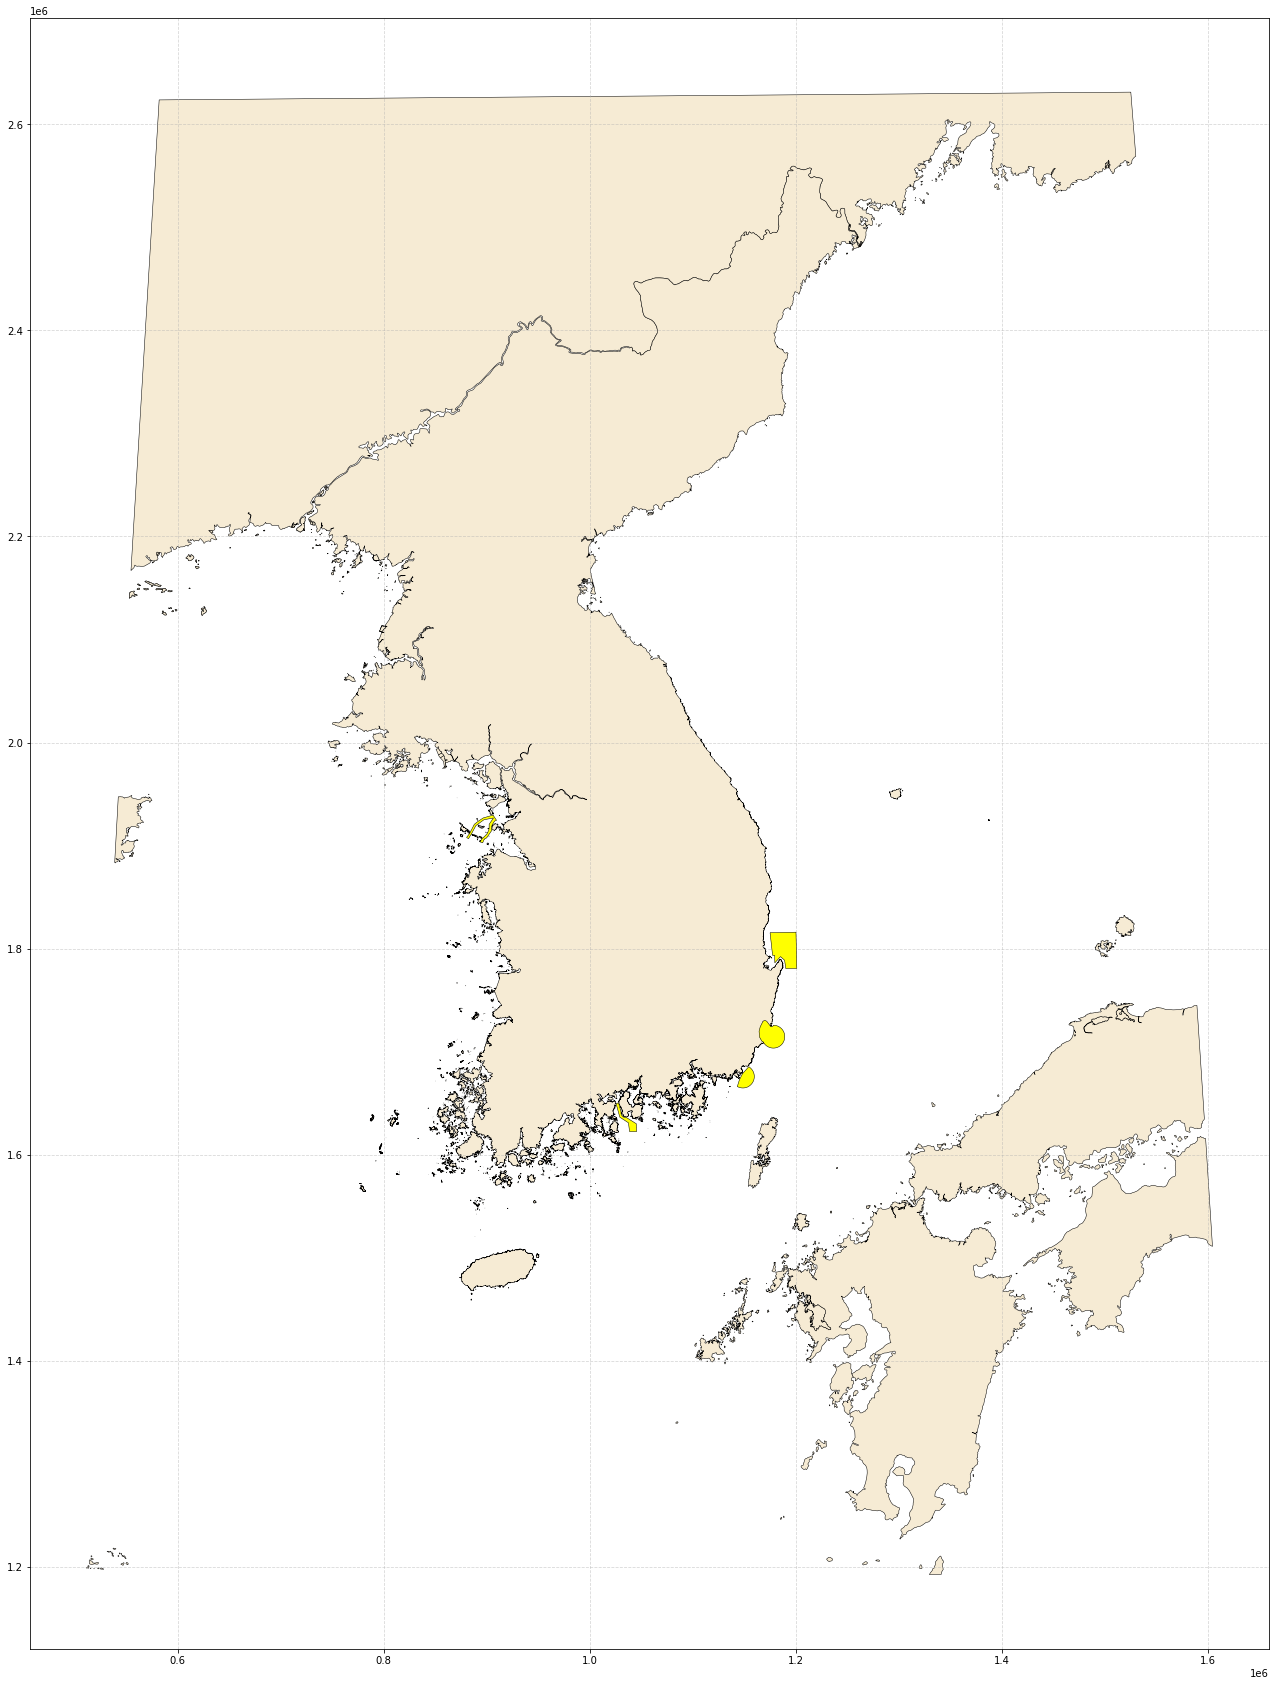

In [67]:
df = object.difference(input)
df.dropna(inplace=True)
plot_map(df)

In [68]:
df

0    POLYGON ((1045302.222 1629974.788, 1045645.624...
1    POLYGON ((1175146.030 1815364.584, 1200285.681...
2    POLYGON ((1187313.709 1720997.504, 1187331.068...
3    POLYGON ((1145309.512 1672417.650, 1148283.100...
4    POLYGON ((907716.874 1923773.173, 905409.729 1...
dtype: geometry

In [70]:
b
result

,OBJECTID,name,geometry
0,5.0,b'\xb1\xb3\xc5\xeb\xbe\xc8\xc0\xfc\xc6\xaf\xc1...,"POLYGON ((1038768.103 1622367.250, 1037664.303..."
1,4.0,b'\xb1\xb3\xc5\xeb\xbe\xc8\xc0\xfc\xc6\xaf\xc1...,"POLYGON ((1177591.386 1793371.046, 1175146.030..."
2,3.0,b'\xb1\xb3\xc5\xeb\xbe\xc8\xc0\xfc\xc6\xaf\xc1...,"MULTIPOLYGON (((1188998.747 1711581.006, 11889..."
3,2.0,b'\xb1\xb3\xc5\xeb\xbe\xc8\xc0\xfc\xc6\xaf\xc1...,"POLYGON ((1143342.975 1666086.668, 1145309.512..."
4,1.0,b'\xb1\xb3\xc5\xeb\xbe\xc8\xc0\xfc\xc6\xaf\xc1...,"POLYGON ((897768.736 1906301.409, 897765.315 1..."


In [90]:
boundary = input.boundary
boundary.geometry


0        LINESTRING (890129.044 1542331.732, 890131.095...
1        LINESTRING (890110.041 1542384.587, 890112.362...
2        LINESTRING (893121.627 1545874.175, 893121.707...
3        LINESTRING (893169.924 1546042.298, 893171.130...
4        LINESTRING (893105.356 1546162.714, 893105.576...
                               ...                        
19097    LINESTRING (888660.365 1520584.079, 888660.606...
19098    LINESTRING (894311.462 1526853.077, 894311.542...
19099    LINESTRING (894314.388 1526888.322, 894314.549...
19100    LINESTRING (894047.655 1526988.930, 894048.319...
19101    LINESTRING (894103.191 1527056.005, 894103.572...
Length: 19102, dtype: geometry

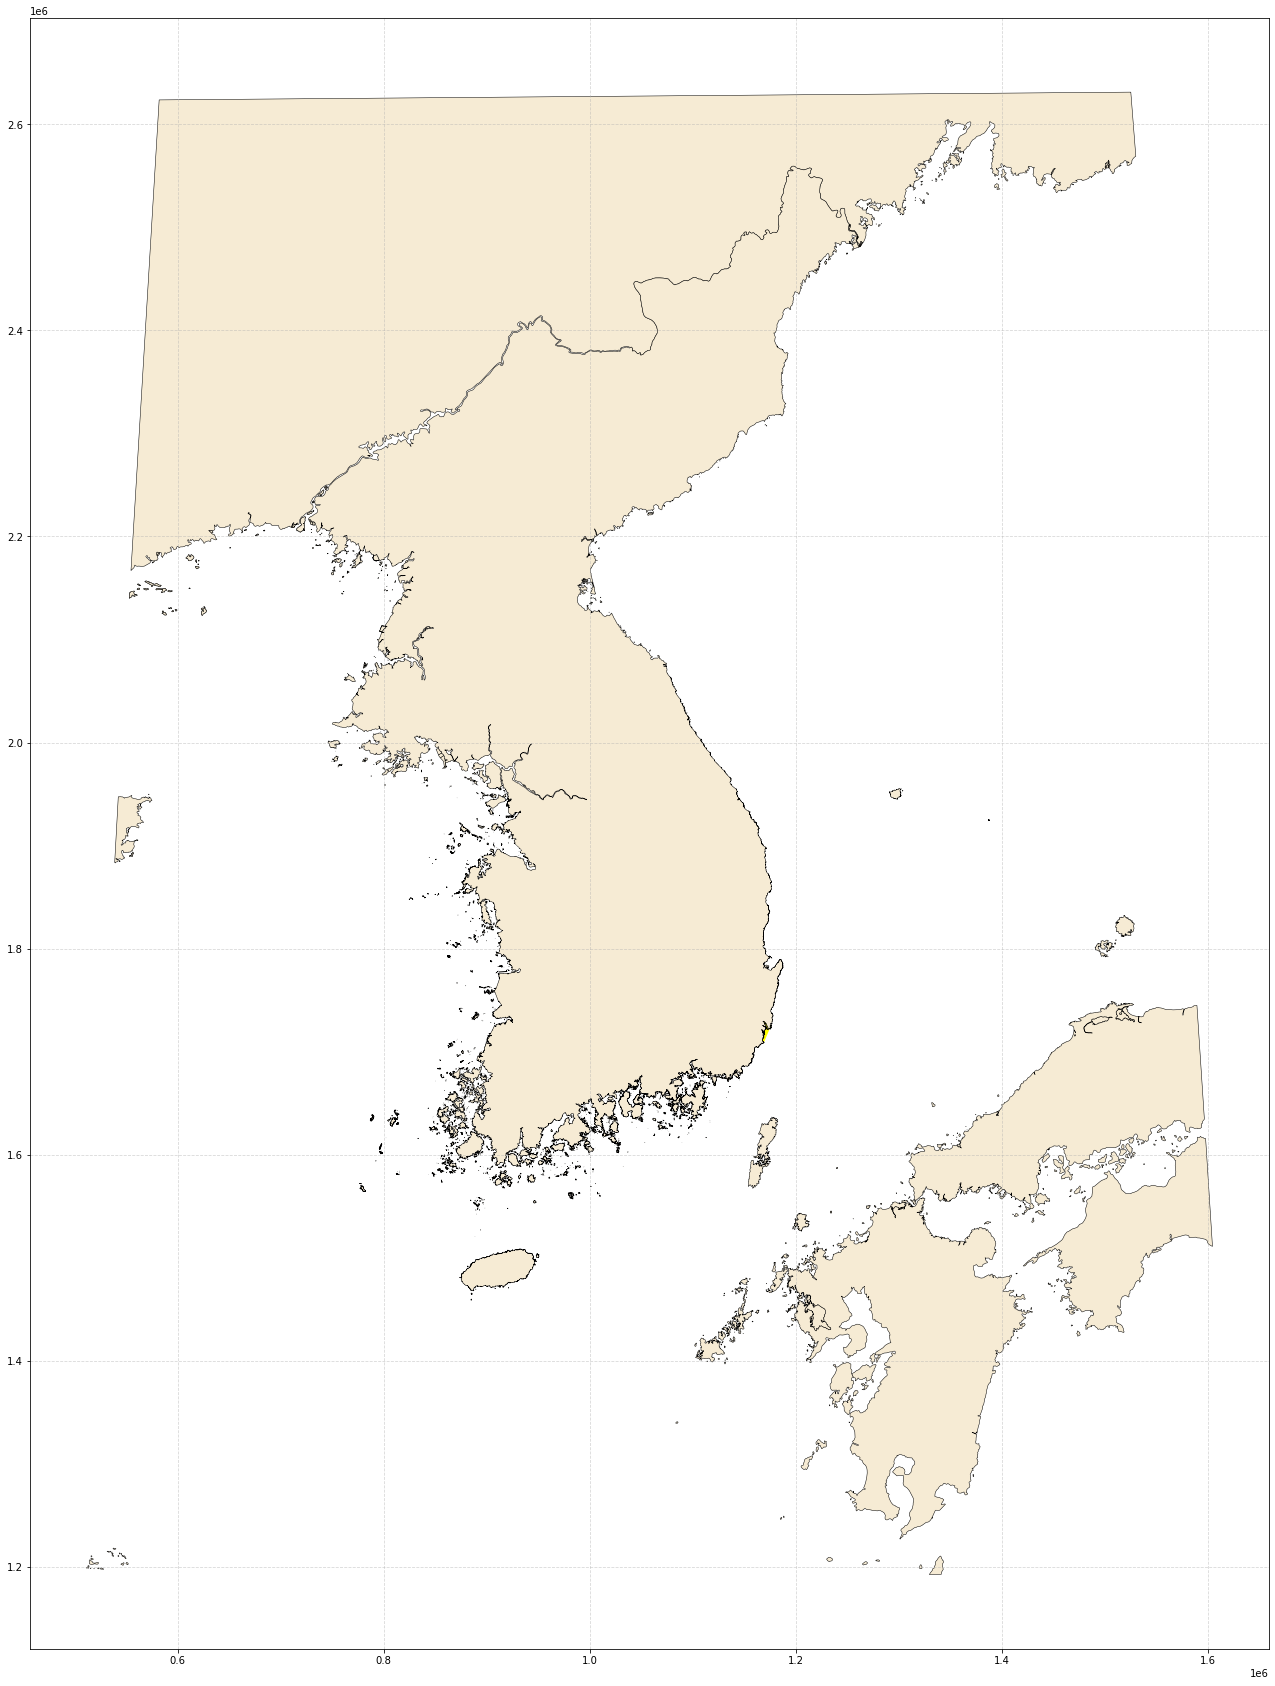

In [98]:
data = gpd.clip(boundary,object)
plot_map(data)

AttributeError: 'GeoDataFrame' object has no attribute 'overlay'

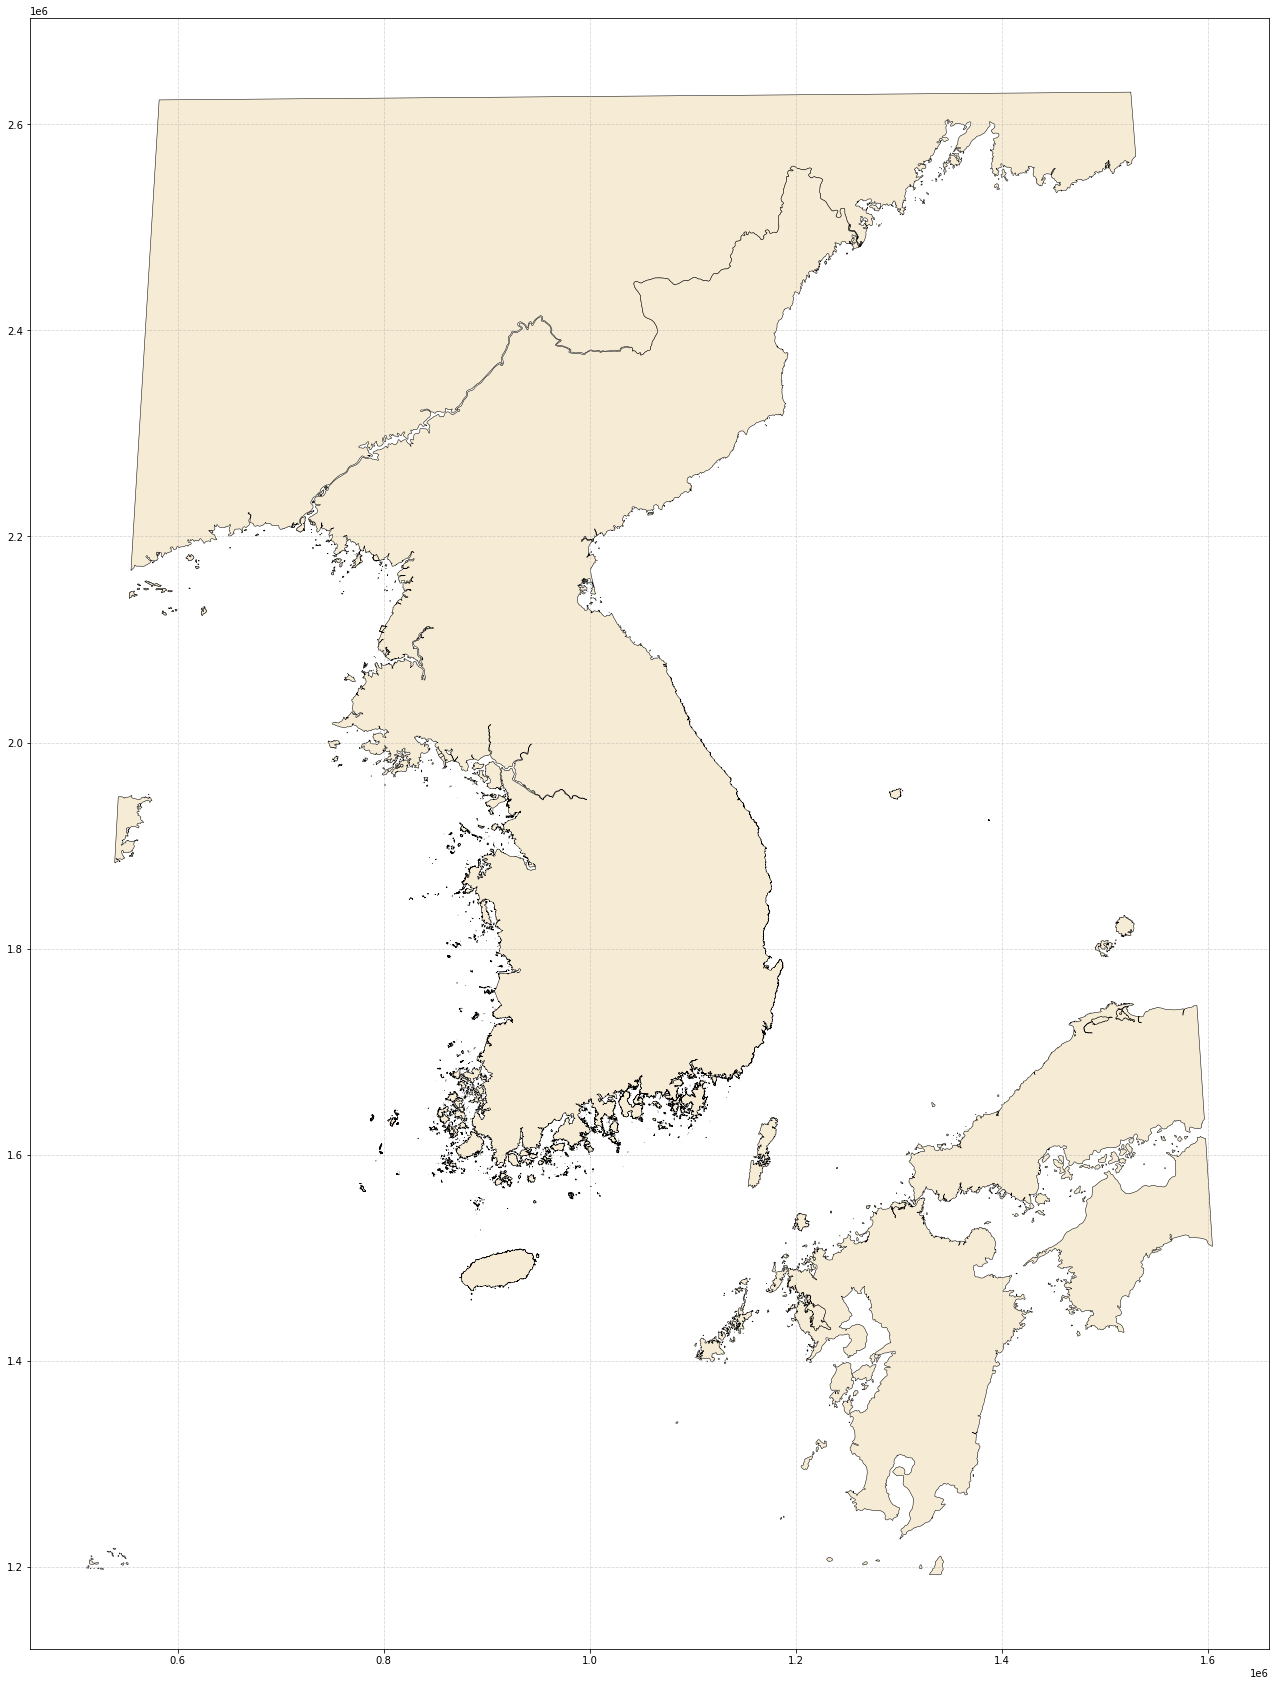

In [102]:
data2 = gpd.overlay(data,object, how='difference')
plot_map(data2)

In [91]:

boundary = gpd.GeoDataFrame(boundary, geometry=boundary.geometry)


In [92]:
result = gpd.overlay(object, boundary,how='difference')
 

In [95]:
result

,OBJECTID,name,geometry
0,5.0,b'\xb1\xb3\xc5\xeb\xbe\xc8\xc0\xfc\xc6\xaf\xc1...,"POLYGON ((1038768.103 1622367.250, 1037664.303..."
1,4.0,b'\xb1\xb3\xc5\xeb\xbe\xc8\xc0\xfc\xc6\xaf\xc1...,"POLYGON ((1177591.386 1793371.046, 1175146.030..."
2,3.0,b'\xb1\xb3\xc5\xeb\xbe\xc8\xc0\xfc\xc6\xaf\xc1...,"POLYGON ((1188998.747 1711581.006, 1188972.042..."
3,2.0,b'\xb1\xb3\xc5\xeb\xbe\xc8\xc0\xfc\xc6\xaf\xc1...,"POLYGON ((1143342.975 1666086.668, 1145309.512..."
4,1.0,b'\xb1\xb3\xc5\xeb\xbe\xc8\xc0\xfc\xc6\xaf\xc1...,"POLYGON ((893722.963 1903533.867, 895388.238 1..."


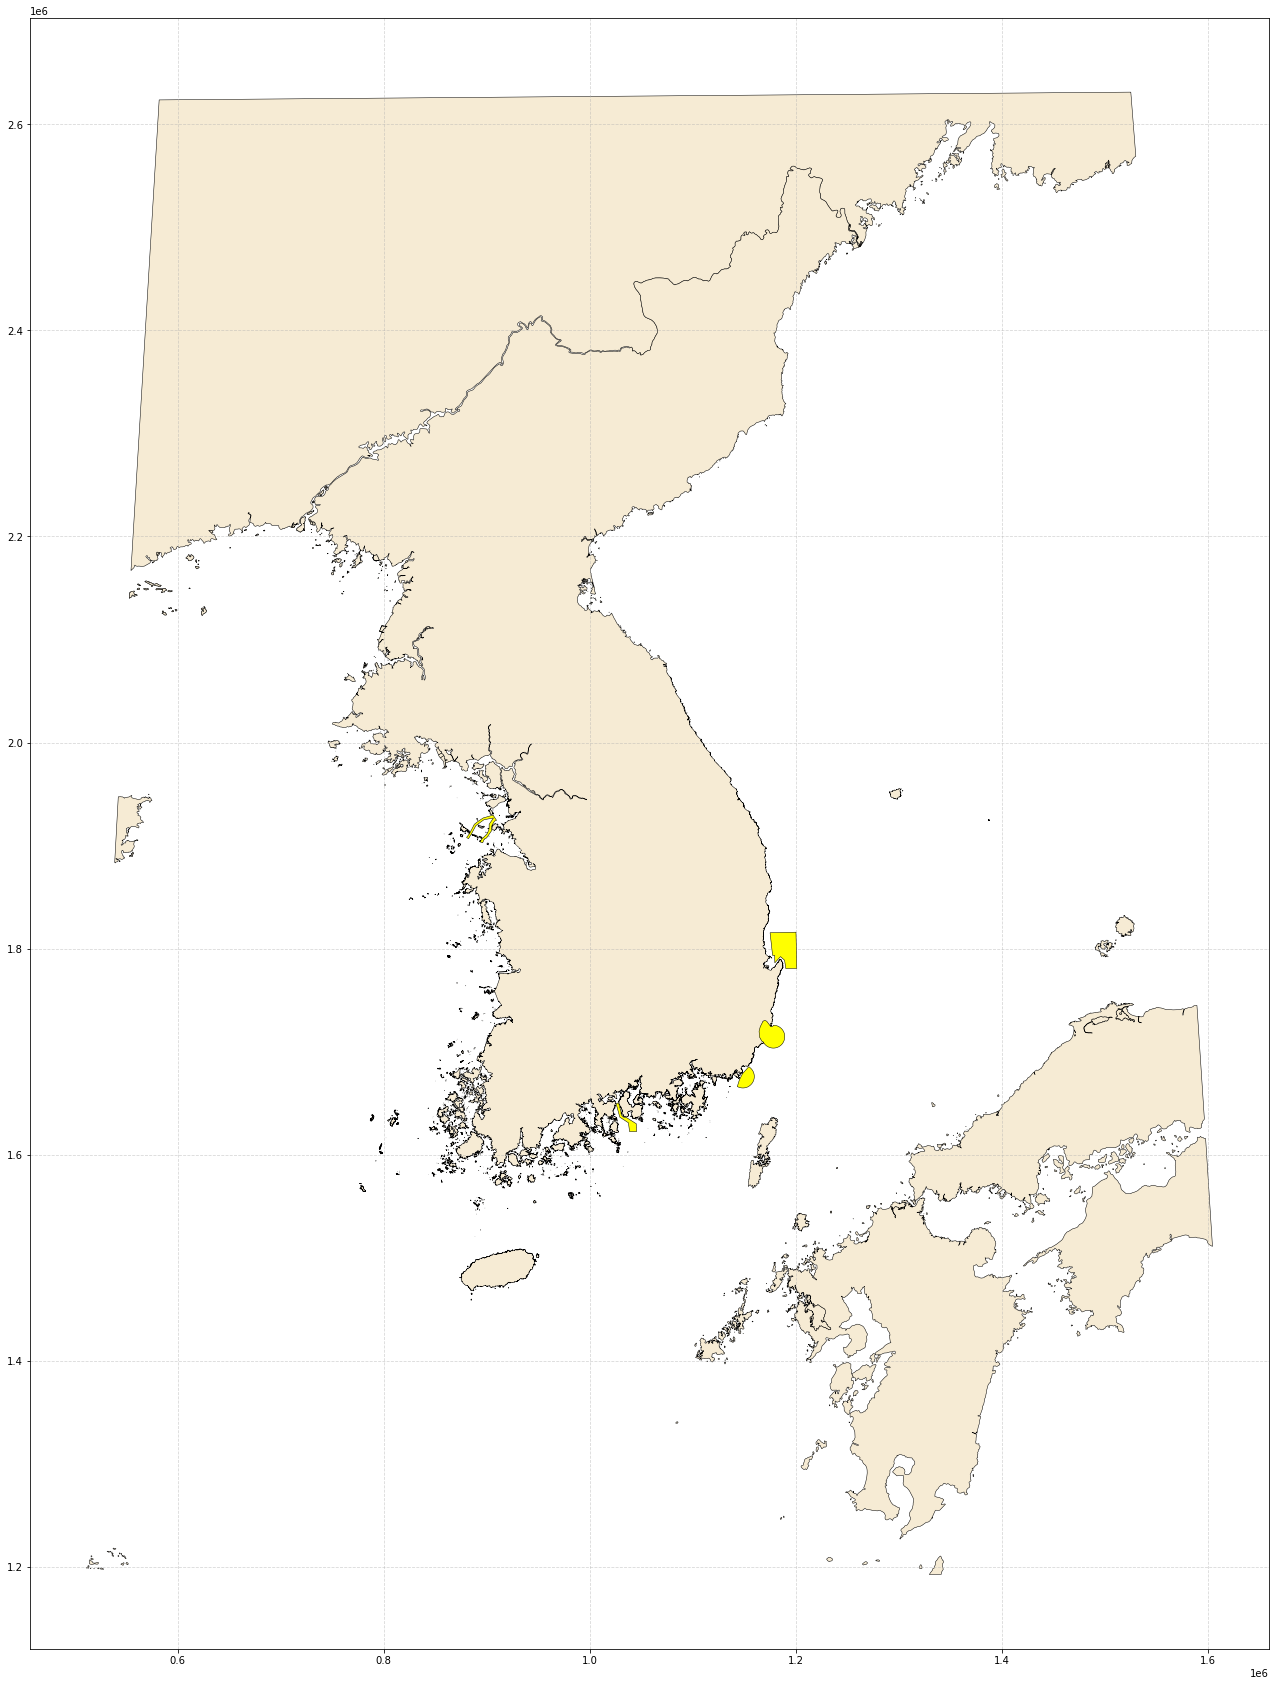

In [96]:
plot_map(result)

,OBJECTID,name,geometry
0,5.0,b'\xb1\xb3\xc5\xeb\xbe\xc8\xc0\xfc\xc6\xaf\xc1...,"POLYGON ((1038768.103 1622367.250, 1037664.303..."
1,4.0,b'\xb1\xb3\xc5\xeb\xbe\xc8\xc0\xfc\xc6\xaf\xc1...,"POLYGON ((1177591.386 1793371.046, 1175146.030..."
2,3.0,b'\xb1\xb3\xc5\xeb\xbe\xc8\xc0\xfc\xc6\xaf\xc1...,"MULTIPOLYGON (((1188998.747 1711581.006, 11889..."
3,2.0,b'\xb1\xb3\xc5\xeb\xbe\xc8\xc0\xfc\xc6\xaf\xc1...,"POLYGON ((1143342.975 1666086.668, 1145309.512..."
4,1.0,b'\xb1\xb3\xc5\xeb\xbe\xc8\xc0\xfc\xc6\xaf\xc1...,"POLYGON ((897768.736 1906301.409, 897765.315 1..."


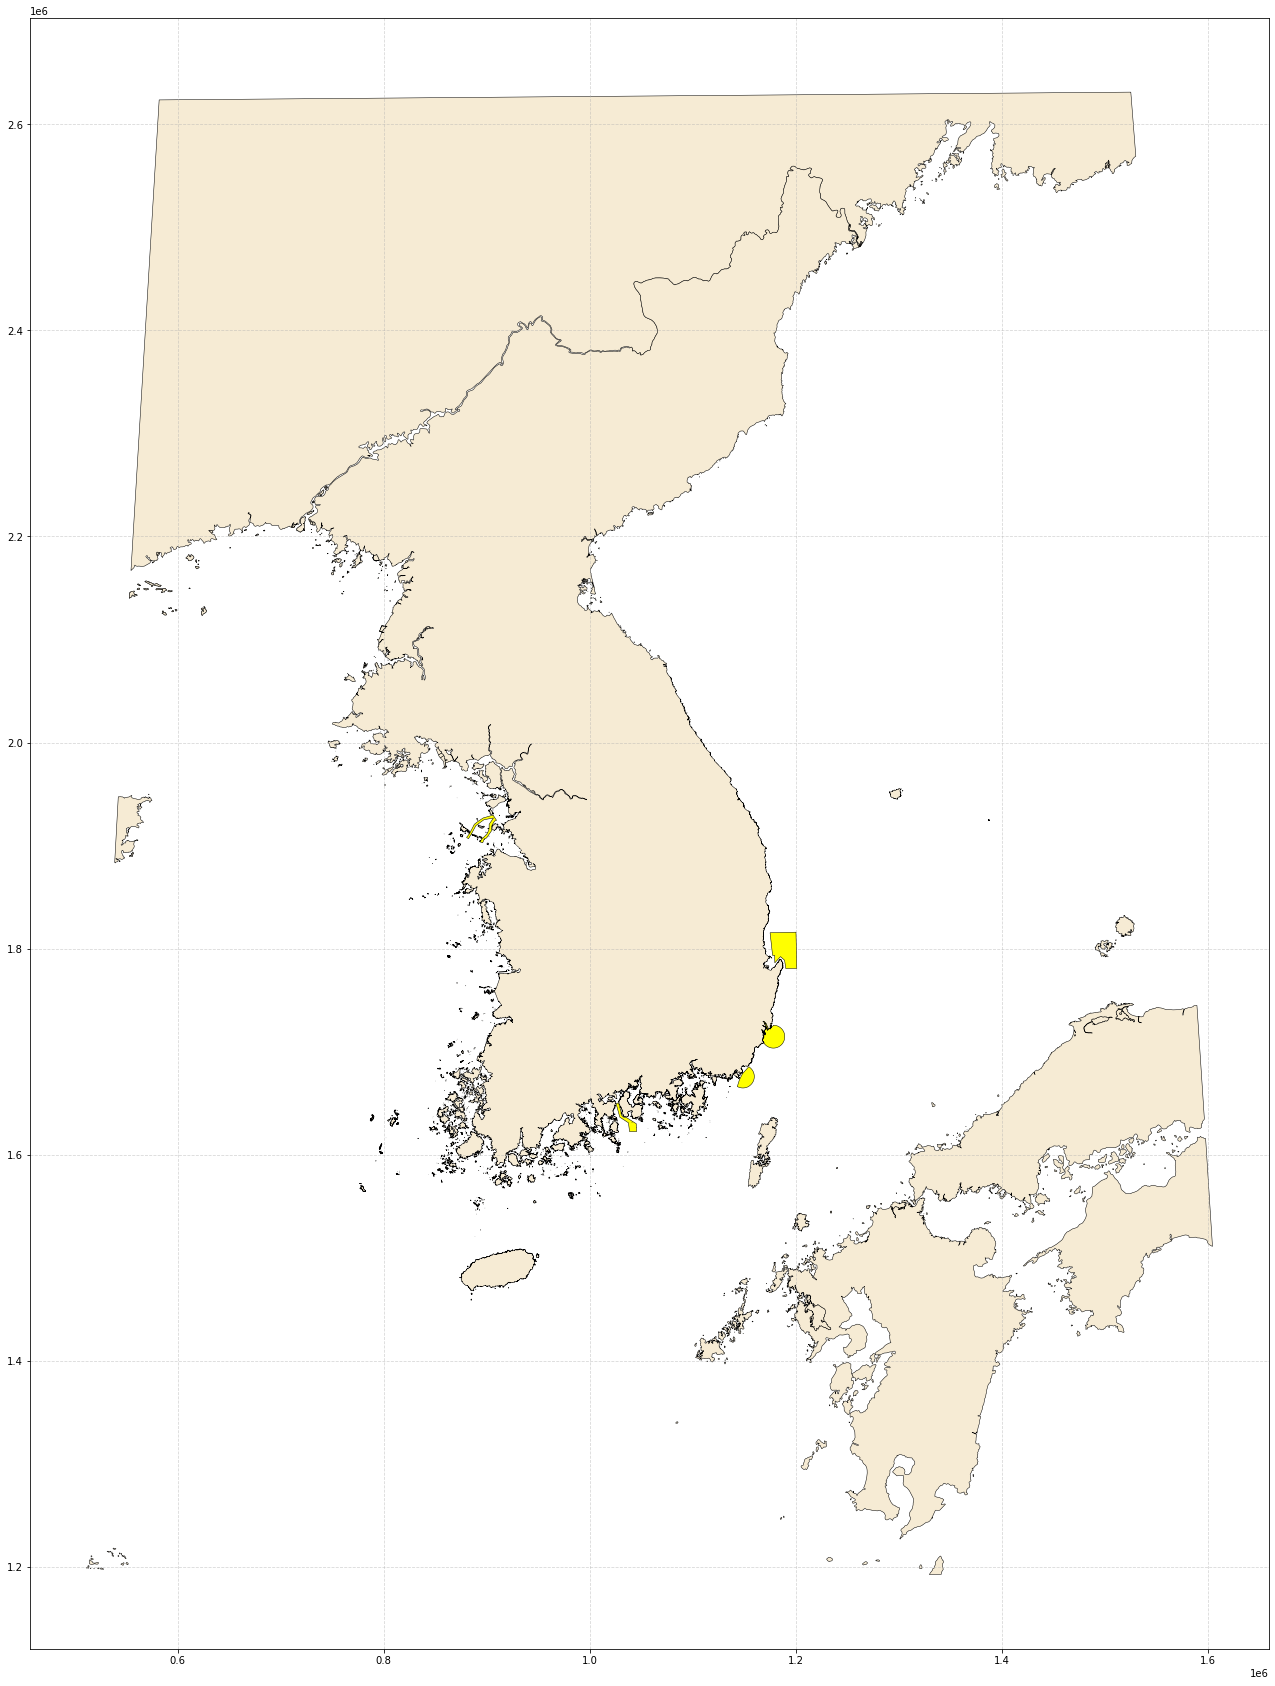

In [97]:
result = gpd.overlay(object,input,how='difference')
plot_map(result)
result

In [105]:
result.geom_type.unique().tolist()

['Polygon', 'MultiPolygon']

result

In [41]:
df.dropna(inplace=True)
df

0    POLYGON ((1045302.222 1629974.788, 1045645.624...
1    POLYGON ((1175146.030 1815364.584, 1200285.681...
2    POLYGON ((1187313.709 1720997.504, 1187331.068...
3    POLYGON ((1145309.512 1672417.650, 1148283.100...
4    POLYGON ((907716.874 1923773.173, 905409.729 1...
dtype: geometry

C:\Users\PPARK\anaconda3\envs\geopandas2\lib\site-packages\geopandas\base.py:32: UserWarning: The indices of the two GeoSeries are different.
  warn("The indices of the two GeoSeries are different.")


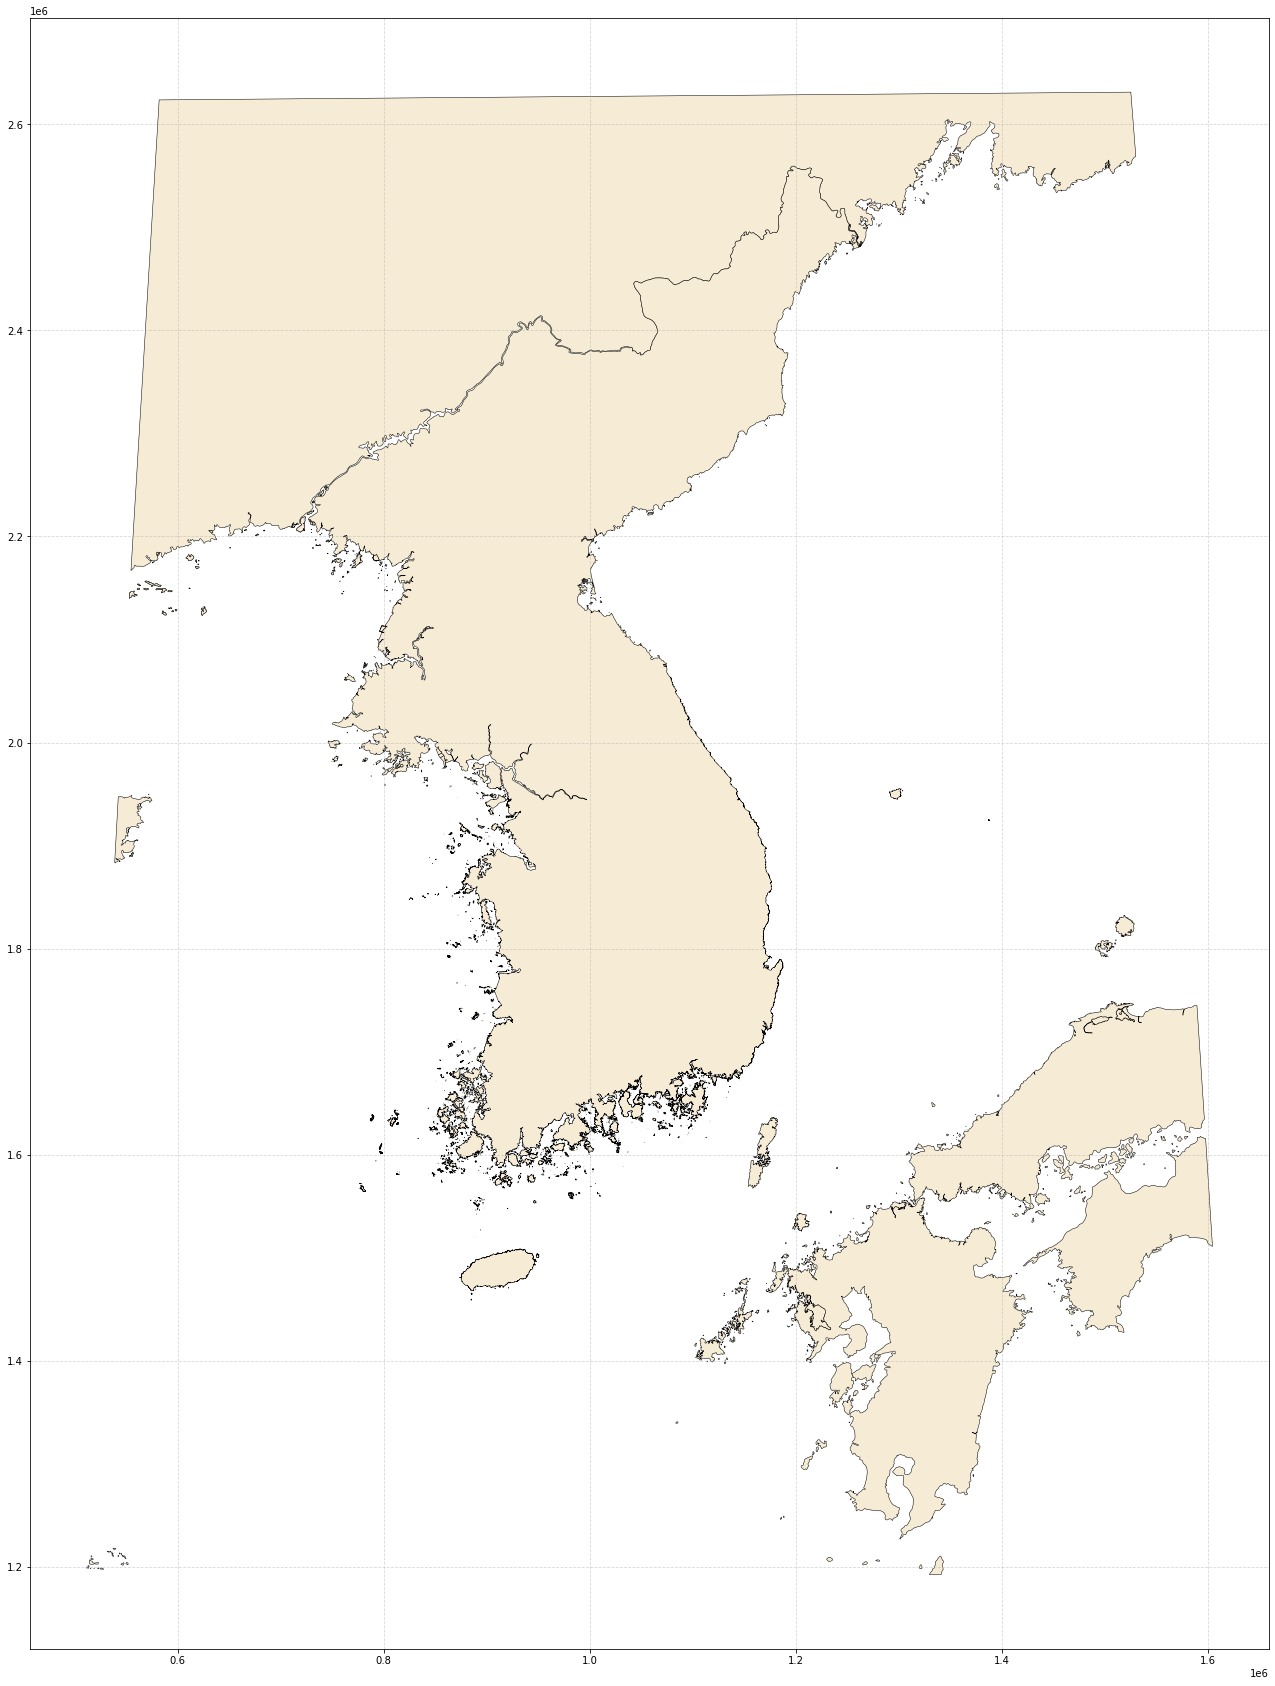

In [47]:
df = input.difference(object)
plot_map(df)

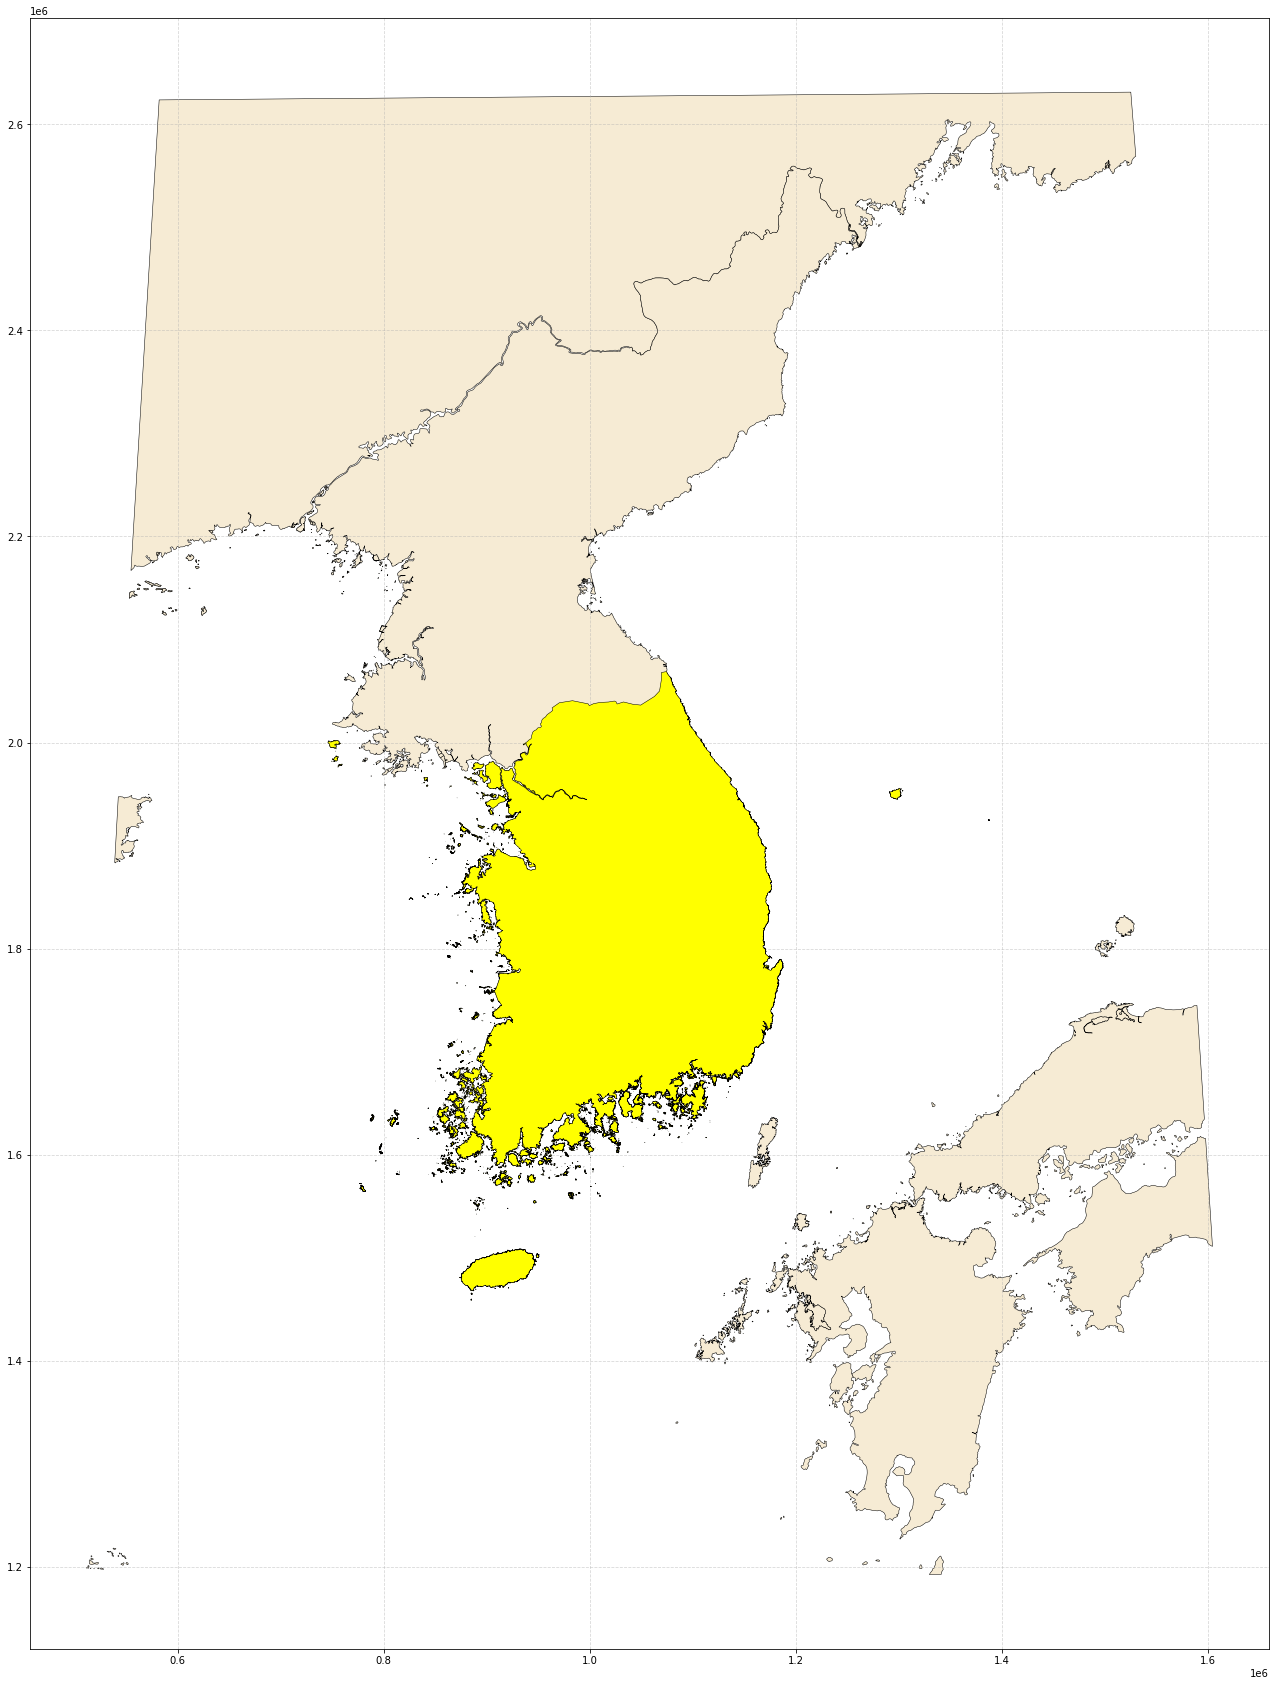

In [39]:
plot_map(input)

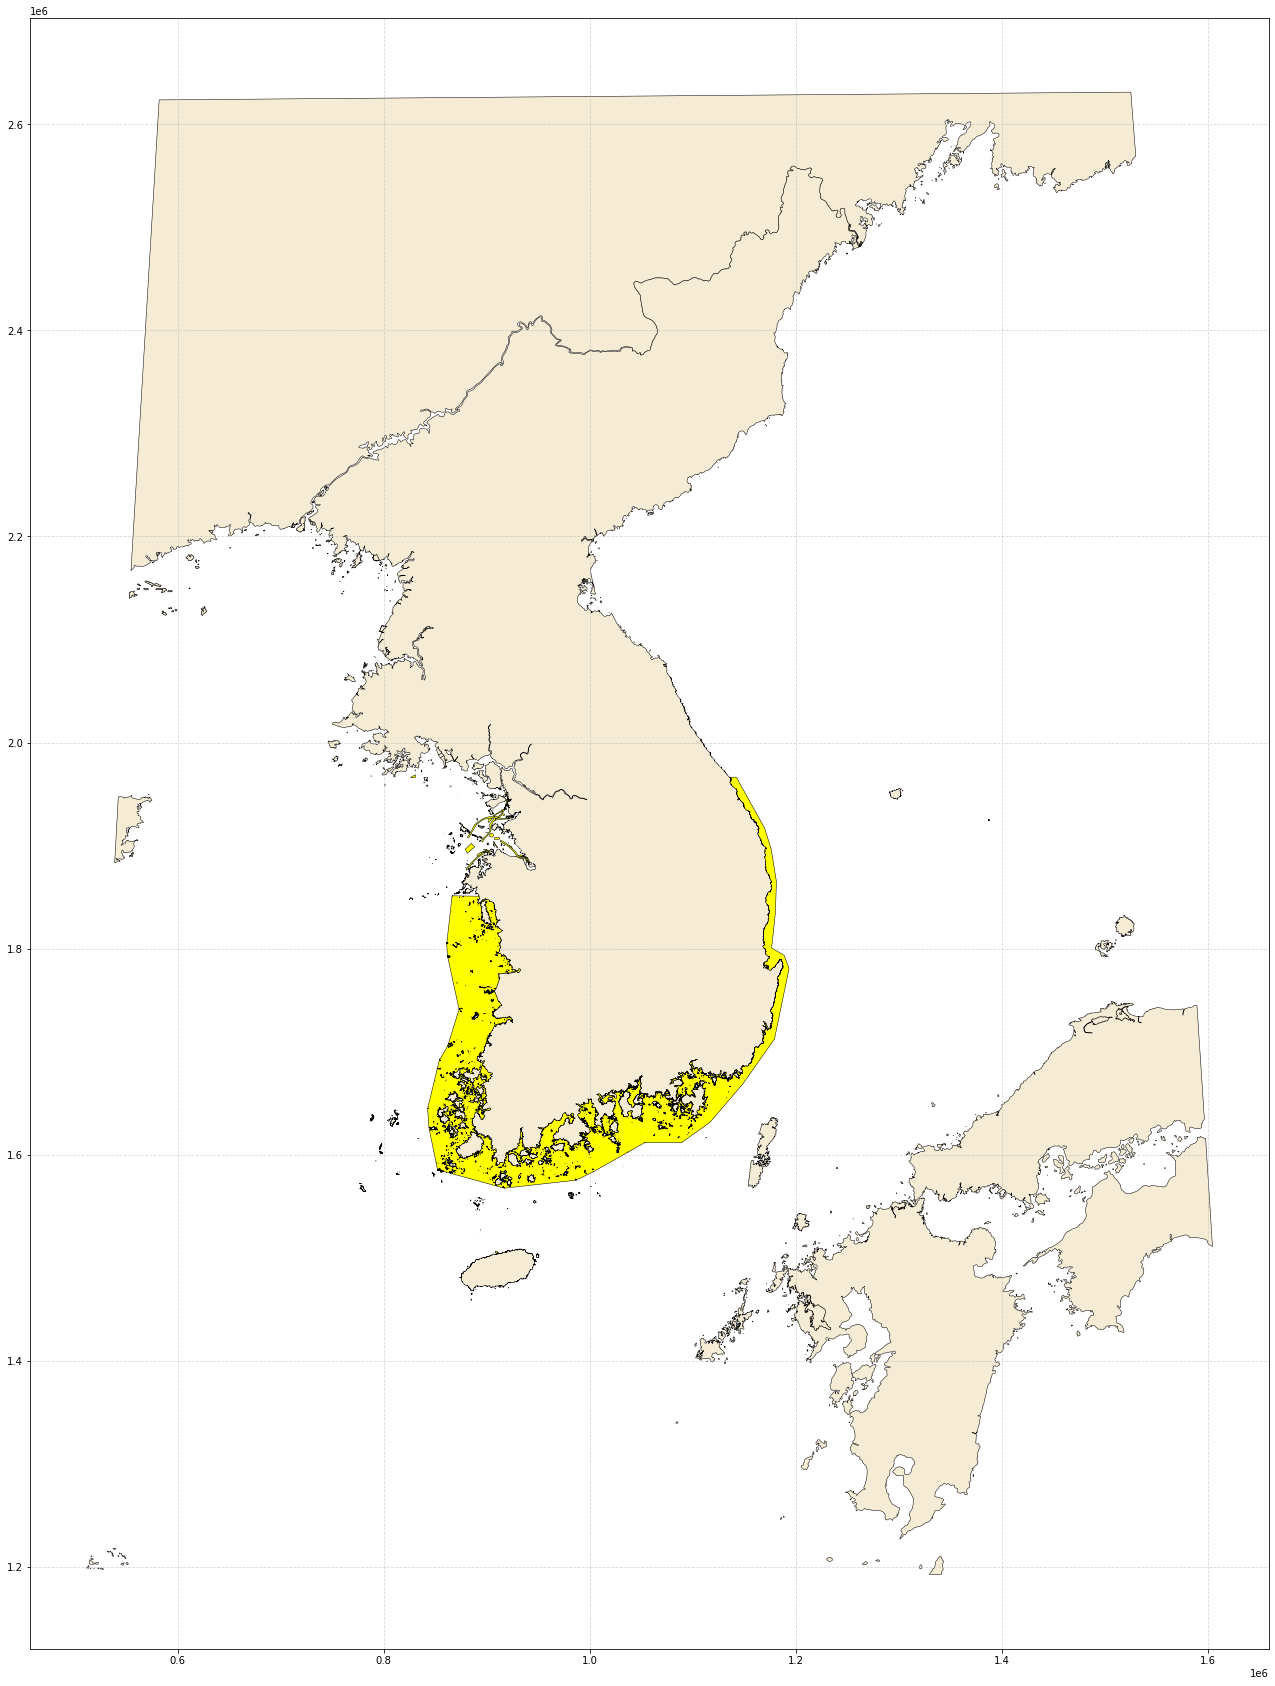

In [12]:
plot_map(object)

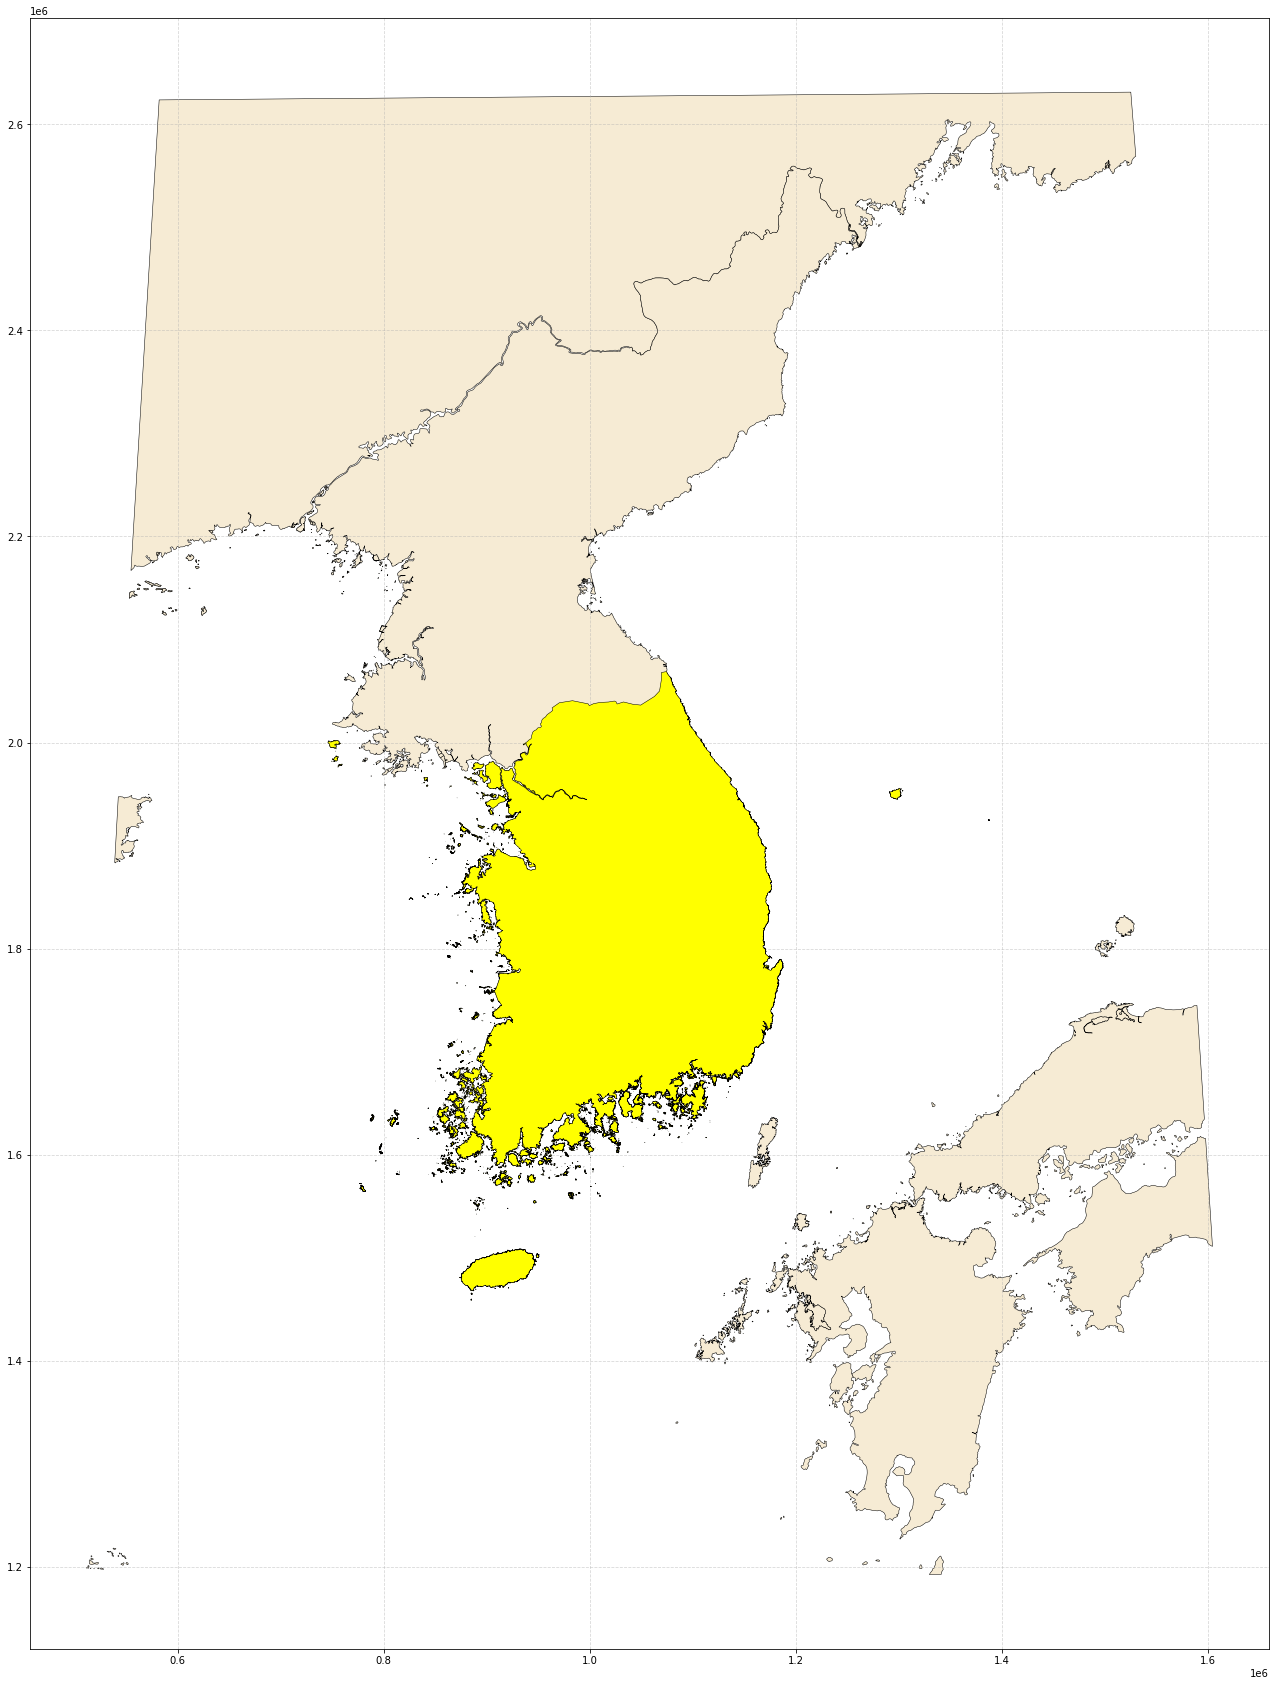

In [13]:
plot_map(input)

In [ ]:
gpd.geom_equals(polygon)

In [22]:
input[input.intersects(object)==True]

C:\Users\PPARK\anaconda3\envs\geopandas2\lib\site-packages\geopandas\base.py:32: UserWarning: The indices of the two GeoSeries are different.
  warn("The indices of the two GeoSeries are different.")


,OBJECTID,Shape_Leng,Shape_Area,label,_count,_sum,_mean,area,geometry
